In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")
print(df.head)



<bound method NDFrame.head of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>


In [5]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]  # independent features
y = df['Weight']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Polynomial Transformation (degree=2)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [20]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test_poly)


In [22]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9609431981617572
Mean Squared Error: 5555.411639564191


In [23]:
from sklearn.metrics import mean_absolute_error

# 📊 METRICS
# =======================
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics")
print("--------------------------")
print(f"R² Score : {r2:.3f}")
print(f"MAE      : {mae:.2f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")

Model Performance Metrics
--------------------------
R² Score : 0.961
MAE      : 53.52
MSE      : 5555.41
RMSE     : 74.53


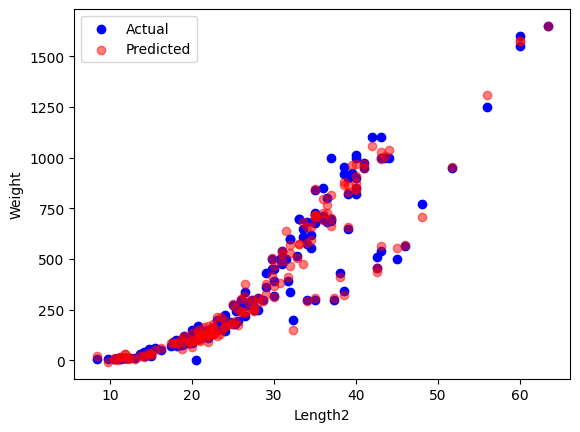

In [24]:
# Visualize Weight vs Length3 (example)
plt.scatter(df['Length2'], df['Weight'], color='blue', label='Actual')
plt.scatter(df['Length2'], model.predict(poly.transform(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])), color='red', label='Predicted', alpha=0.5)
plt.xlabel("Length2")
plt.ylabel("Weight")
plt.legend()
plt.show()